# PSU DS 200 
## Project Utility Jupyter Notebook 2
### November 19, 2019
### Updated November 22, 2019

### Instructor: John Yen

#### This Jupyter Notebook is intended to be used to construct Project Deliverables #2 for the Mini-project of DS 200. 

## The goal of this utility is to extract important features from a model so that you can combine them with the visualization of decision trees to do the following:
- To identify, among the very large number (hundreds) of features, what features are actually important for the model.
- By combining important features with the decision tree visualizations to interpret the role they play in the model (e.g., Does the appearance (or lack of appearance) of a word in a tweet more likely indicate a positive tweet for ...?)
- By comparing important features generated in different folds in a k-fold cross validation, we can not only identify multiple sets of important features, but also start to generate additional questions regarding these features and the class (e.g., positive/negative sentiment) you want to predict from a tweet.

#### Acknowledgement: The datascience module is developed by University of California Berkeley for its data 8 course.

#### Why extracting important features from a model is important?
- This helps people using the model to better understand the patterns/knowledge the model learns from the data.
- Being able to understand the knowledge captured in a model is the first step toward helping people to develop a suitable level of "trust" on the model.
- Comparing important features across different folds of a cross validation can also indicate whether the importance of the feature is "reliable".

#### How does sklearn help to identify important features
- The decision tree learning of sklearn module provides feature_importances, which is an array of "feature names" and associated "importance measure".  The importance measure of all features add up to 1.


In [1]:
!pip install datascience

     |████████████████████████████████| 51kB 623kB/s eta 0:00:011
     |████████████████████████████████| 92kB 957kB/s eta 0:00:01
     |████████████████████████████████| 13.0MB 54kB/s  eta 0:00:01    |███▌                            | 1.4MB 4.4MB/s eta 0:00:03     |██████████████████████▊         | 9.2MB 3.6MB/s eta 0:00:02
     |████████████████████████████████| 215kB 11.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/65/e0/eb35e762802015cab1ccee04e8a277b03f1d8e53da3ec3106882ec42558b/Jinja2-2.10.3-py2.py3-none-any.whl
     |████████████████████████████████| 92kB 1.1MB/s eta 0:00:011
  Created wheel for datascience: filename=datascience-0.15.3-cp35-none-any.whl size=44582 sha256=5ec6bd7e3e97275b4a8f5afcc78d0f46f87094653f6bb8f9a8081b96ccd6b296
  Stored in directory: /home/nbuser/.cache/pip/wheels/b8/37/0a/80274866028f6485c5957f0e1acf8e2b755fbe9dd0fd4ad275
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=19851 sha256=931758fd66d6ec7826

In [2]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

from graphviz import *

import pandas as pd
import numpy as np

from sklearn.externals import joblib

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
t1 = Table.read_table("Trade War Tweets.csv", sep =',')
t1.show(10)

Text,Relevant
'China has set up a new national semiconductor fund of $ ...,1
'I hardly knew them. Ihave my picture taken with many ma ...,0
'The Art Of The Heel.',0
[OP-ED] Will Japan and South Korea Ever Find Peace in th ...,1
@2k19Ark @biggmos1 @MMChionchio @iyfanboi @DavidWohl @re ...,0
@aaforringer @k8tlyn @Narvina1 @IanMacK09017816 @Vandals ...,0
@AlinaBGuerra1 @JackPosobiec I agree. Bathe subsidies to ...,1
@alyxmxe Major segments are data center whichll be up du ...,0
@AmirLein @Imamofpeace Certainly. But surely you can agr ...,1
@angelsfan1982 @JeffFletcherOCR Of the 41 1st round draf ...,0


### The code below extract the "class label" from the CSV file to find out the total number of positive/supportive vs negative/non-supportive tweets in the labelled data set.
### If you use Climage Change tweets, the column label for the class label is 'Support'.
### If you use Airline Sentiment tweets, the column label for the class label is 'airline_sentiment' (as shown in Lab9)

In [4]:
t1_positive = t1.where('Relevant', are.equal_to(1))
t1_negative = t1.where('Relevant', are.equal_to(0))
t1_positive

Text,Relevant
'China has set up a new national semiconductor fund of $ ...,1
[OP-ED] Will Japan and South Korea Ever Find Peace in th ...,1
@AlinaBGuerra1 @JackPosobiec I agree. Bathe subsidies to ...,1
@AmirLein @Imamofpeace Certainly. But surely you can agr ...,1
@badwebsites So the real reason for the trade war.,1
@BW This trade war was brilliant dog eating China must c ...,1
@bykowicz Well his trade war has decimated the timber bu ...,1
@chuks4uche @ilynem He puts his friends 1st. Starts a tr ...,1
@essenviews @denver_rose guess that means that Donnieboy ...,1
@ForestMagusFilm @Lewis30730015 The trade war with China ...,1


In [5]:
t1_negative

Text,Relevant
'I hardly knew them. Ihave my picture taken with many ma ...,0
'The Art Of The Heel.',0
@2k19Ark @biggmos1 @MMChionchio @iyfanboi @DavidWohl @re ...,0
@aaforringer @k8tlyn @Narvina1 @IanMacK09017816 @Vandals ...,0
@alyxmxe Major segments are data center whichll be up du ...,0
@angelsfan1982 @JeffFletcherOCR Of the 41 1st round draf ...,0
@atrupar That's some real 4d chess for Dems to secretly ...,0
@BaldingsWorld did you read this?,0
@Bennythesnitch @realDonaldTrump Hmm. What's this? https ...,0
@BohmHYPE Ive resigned myself to not signing Strasburg o ...,0


In [6]:
data = t1_positive.append(t1_negative)

In [7]:
data

Text,Relevant
'China has set up a new national semiconductor fund of $ ...,1
[OP-ED] Will Japan and South Korea Ever Find Peace in th ...,1
@AlinaBGuerra1 @JackPosobiec I agree. Bathe subsidies to ...,1
@AmirLein @Imamofpeace Certainly. But surely you can agr ...,1
@badwebsites So the real reason for the trade war.,1
@BW This trade war was brilliant dog eating China must c ...,1
@bykowicz Well his trade war has decimated the timber bu ...,1
@chuks4uche @ilynem He puts his friends 1st. Starts a tr ...,1
@essenviews @denver_rose guess that means that Donnieboy ...,1
@ForestMagusFilm @Lewis30730015 The trade war with China ...,1


In [8]:
# Use the data for constructing a Decision Tree Classifier
data_tagged_X= list(data['Text'])
data_tagged_Y= list(data['Relevant'])

print('tagged data input size', len(data_tagged_X))
print('tagged data target prediction size', len(data_tagged_Y))

tagged data input size 300
tagged data target prediction size 300


### Important Features for the Model with Best Max_depth

In Mini-project Deliverable #1, you have chosen a best value for max_depth of the decision tree model based on Stratified KFold Cross Validation.

In this Mini-project Deliverable, you will use the max_depth you chose from Deliverable #1 to construct decision trees and extract 10 most important features from your model.  If we only do this on one 
decision tree, we do not know how reliable is the feature importance result (just like we are not
as certain of the f1 value of testing data based on only one training-testing split).  

### Using Stratified KFold CV to Identify Reliably Important Features

Therefore, we can use Stratified KFold Cross Validation to construct k sets of important features, one
for each model constructed in each fold. This will provide us information on how reliable is the feature importance across the k fold.  For example, if a feature is always in the top 3 important feature in all
k folds, the high importance of the feature is quite reliable.  On the other hand, if a feature occurs in top 10 important feature only once among the k fold, the importance of the feautre is not as reliable as others that occur more often.

In [26]:
## Set the max_depth parameter value to be the one you chose for Mini-Project Deliverable #1

Best_max_depth= 5

### Stratified KFold Cross Validation
StratifiedKFold is a function in sklearn under the submodule model_selection.
#### Notice: In the beginning of this notebook, we import StratifiedKFold using the following python code:
    from sklearn.model_selection import StratifiedKFold
    
The n_splits parameter of StratifiedKFold indicates how many folds to use.  For example, 
n_splits=5 means Stratified 5-fold cross validation.


In [27]:
# Use Stratified Kfold Cross Validation so that
#   each fold contains the same ratio of positive/negative instances
k = 5
skf = StratifiedKFold(n_splits= k , random_state=1, shuffle= True)

In [42]:
### Set the range of max_depth to be around the 
low_max_depth = Best_max_depth - 2
high_max_depth = Best_max_depth + 5
training_performance_table = np.empty( [high_max_depth+1, k+1, 5] )
testing_performance_table = np.empty( [high_max_depth+1, k+1, 5] )

### Prepare the table to store total feature_importance (for each feature) across k folds; as well as
### the average, minimum, and maximum of feature_importance (for each feature) across k folds
feature_importance_k_fold_sum = np.empty( [high_max_depth+1, 1])
feature_importance_k_fold_avg = np.empty( [high_max_depth+1, 1])

### Create a CountVectorizer to map word features of all words in labelled data to index of word frequency matrix
### Note that this does NOT mean all tweets are used for training, it only means we create the columns of
### word frequency matrix using all words in the labelled tweets.  
count_vect = CountVectorizer(token_pattern='((?:([@#]|[0-9]|[a-z]|[A-Z])+))', analyzer= 'word', min_df=2)
x_all = list(data['Text'])
count_vect = count_vect.fit(x_all)


### Calculate Average, Minimum, and Maximum f1 score across folds 
The first dimension of training_performance_table refers to a specific max_depth value.
The second dimension of training_performance_table refers to the number of a fold (in a k-fold).
The third dimension of training_performance_table saves f1 score in index "3".

For example, the code below returns an array of f1_score for all k folds for max_depth set to 7.

In [43]:
feature_names = count_vect.get_feature_names()
### Turn feature_names into an array so that we can iterate over its elements
feature_names_array = np.asarray(feature_names)
WF_dimension = len(feature_names)

feature_importance_array = np.empty([k+1, WF_dimension])

### Extract only words/hashtags from feature_names into a list of words only
words_only_list = list()

for i in range(0,WF_dimension):
    # Extract the first word of each (word, character) pair in feature_names_array
    words_only_list.append(feature_names_array[i,0])

print(words_only_list)


['#', '#5g', '#brokenpromises', '#ccp', '#china', '#hongkong', '#huawei', '#pla', '#prc', '#renzhengfei', '#spy', '#tradewar', '#trump', '000', '1', '100', '159', '1st', '2', '20', '2016', '2019', '22', '3', '4', '45', '5', '688', '7', '775', '9', '93', '943', '@bw', '@coton', '@ddale8', '@economics', '@feelings', '@forourfuturewi', '@gop', '@housegop', '@jackposobiec', '@jendeben', '@markets', '@mrsperrin', '@nar', '@nationaldebt', '@potus', '@rarecombo', '@rbreich', '@realdonaldtrump', '@scottadamssays', '@sdonnan', '@senkevincramer', '@solomonyue', '@whitehouse', '@youtube', 'a', 'about', 'account', 'across', 'actually', 'affected', 'after', 'again', 'against', 'agree', 'agreement', 'algorithm', 'all', 'along', 'already', 'also', 'america', 'american', 'amid', 'amp', 'an', 'and', 'another', 'antichrist', 'appropriate', 'are', 'argue', 'article', 'as', 'at', 'attention', 'auto', 'avoids', 'back', 'bailout', 'bailouts', 'battle', 'be', 'because', 'been', 'before', 'began', 'behind', '

In [44]:
for depth in range(low_max_depth, high_max_depth+1):
    
    ### Prepare the feature_importance_array to store all feature importance weights for all k folds
    feature_names = count_vect.get_feature_names()
    WF_dimension = len(feature_names)
    feature_importance_array = np.empty([k+1, WF_dimension])
    
    fold = 1
    print("***** Maximum Depth of Decision Tree is ", depth, "******")
    for train_index, test_index in skf.split(data_tagged_X, data_tagged_Y):
        print("Fold Number:", fold)
     #   print("Training Data Index:", train_index)
 #       print("Testing Data Index:", test_index)  
        x_train= list(data.take(train_index)['Text'])     
    #    print("Training Data:", x_train)
        y_train= list(data.take(train_index)['Relevant'])
    #    print("Training Data Target Output:", y_train)
        x_test= list(data.take(test_index)['Text'])
    #    print("Testing Data:", x_test)
        y_test= list(data.take(test_index)['Relevant'])
    #   print("Testing Data Target Output:", y_test)
    
    #   We use transform here, rather than fit_transform, because the word frequency columns have been identified 
    #   earlier using fit
        X_word_vect = count_vect.transform(x_train)
        clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=depth, \
                                  min_samples_leaf =2)
        clf.fit(X_word_vect, y_train)
        ### Use the model generated to predict for training data
        predicted_training_y = clf.predict(X_word_vect)
        train_p = metrics.precision_score(y_train, predicted_training_y)
        train_r = metrics.recall_score(y_train, predicted_training_y)
        train_f1= metrics.f1_score(y_train, predicted_training_y)
        training_performance_table[depth, fold, 0]=depth
        training_performance_table[depth, fold, 1]=train_p
        training_performance_table[depth, fold, 2]=train_r
        training_performance_table[depth, fold, 3]=train_f1
        print("Max depth is ", depth, "Prediction Performance for Training Data f1:", train_f1)
        
        ### Use the model generated to predict for testint data
        x_test_word_vect = count_vect.transform(x_test)
        predicted_testing_y = clf.predict(x_test_word_vect)
        
        test_p= metrics.precision_score(y_test, predicted_testing_y)
        test_r= metrics.recall_score(y_test, predicted_testing_y)
        test_f1 = metrics.f1_score(y_test, predicted_testing_y)
        testing_performance_table[depth, fold, 0]=depth
        testing_performance_table[depth, fold, 1]=test_p
        testing_performance_table[depth, fold, 2]= test_r
        testing_performance_table[depth, fold, 3]= test_f1
    #   print("Prediction Performance for Testing Data f1:", test_f1)  
    
        ### Store feature importance of the model as the i-th row in feature_importance_array  
        ### where i is the number of current fold     
        feature_imp = clf.feature_importances_
        ### We store feature importance of kth fold in fold-i row of feature_importance_array
        ### because the first row of the array has index 0.
        feature_importance_array[fold-1] = feature_imp
    #   print("Feature_importance_array:")
    #   print(feature_importance_array)
        
        ### Combine feature importance of this model and feature names to find top 20 important features
        feature_imp_names = zip(feature_imp, words_only_list)
        top_20_features = sorted(feature_imp_names, reverse=True)[:21]
        print("Top 20 important features for fold ", fold)
        for importance, name in top_20_features:
            print(name, importance)
            
        ### Store a visualization of the decision tree model
        dot_data= tree.export_graphviz(clf, out_file=None, feature_names=count_vect.get_feature_names())
        graph = graphviz.Source(dot_data)
        #### Create a string (to be used as the name of the file for storing the deicion tree visualization)
        #### We include fold number in the file name so that we can compare trees with the feature importance of different folds.
        graph_file_name = "ProjectDecisionTree_MaxDepth_" + str(depth) + "_Fold_" + str(fold)
        graph.render(graph_file_name)
        
        fold=fold+1 
    ### Convert Feature Importance Array for all k folds to a Panda DataFrame
    ### with column headings being features (words_only)
    feature_importance_k_fold_DF = pd.DataFrame(data=feature_importance_array, columns=words_only_list)
    
    ### Calculate the mean of feature importance for all words across all k folds
    feature_imp_k_fold_avg = np.mean(feature_importance_array, axis=0)
    # df2 = pd.DataFrame(data=feature_imp_k_fold_avg, columns=words_only_list)
    ### Add the average as the last row to the feature_importance_k_fold_DF
    feature_importance_k_fold_DF.loc[k] = feature_imp_k_fold_avg
    
    ### Sort the feature_importance_k_fold_DF by row k (i.e., average of feature importance)
    sorted_feature_importance_k_fold_DF=feature_importance_k_fold_DF.sort_values(by= k, axis='columns', ascending=False)
    print("Feature_importance_k_fold_DF sorted")
    print(sorted_feature_importance_k_fold_DF)
    ### Save the sorted feature importance DF as a CSV file 
    filename2 = "SortedFeatureImportanceKFoldMaxDepth_" + str(depth) + "_for_" + str(k) + "_Fold" + ".csv"
    sorted_feature_importance_k_fold_DF.to_csv(filename2)       
    
    ### Print top 30 features with highest average feature importance across all folds
    feature_imp_avg_words = zip(feature_imp_k_fold_avg, words_only_list)
    top_30_K_fold_features = sorted(feature_imp_avg_words, reverse=True)[:31]
    print("Top 30 important features across all folds")
    for importance, word in top_30_K_fold_features:
            print(word, importance)

***** Maximum Depth of Decision Tree is  3 ******
Fold Number: 1
Max depth is  3 Prediction Performance for Training Data f1: 0.7632850241545893
Top 20 important features for fold  1
trade 0.4675561210343931
tariffs 0.17209822496907698
war 0.1041442530505907
has 0.08842035996406045
too 0.08428200612167679
trump 0.08349903486020208
yourself 0.0
your 0.0
you 0.0
years 0.0
year 0.0
wrong 0.0
written 0.0
writes 0.0
wow 0.0
would 0.0
working 0.0
won 0.0
with 0.0
wisconsin 0.0
wine 0.0
Fold Number: 2
Max depth is  3 Prediction Performance for Training Data f1: 0.7236180904522612
Top 20 important features for fold  2
trade 0.5139741139785127
tariffs 0.15747097846123603
he 0.09986701137078714
too 0.08248605169034331
war 0.07491088731800717
trump 0.07129095718111371
yourself 0.0
your 0.0
you 0.0
years 0.0
year 0.0
wrong 0.0
written 0.0
writes 0.0
wow 0.0
would 0.0
working 0.0
won 0.0
with 0.0
wisconsin 0.0
wine 0.0
Fold Number: 3
Max depth is  3 Prediction Performance for Training Data f1: 0.73

Fold Number: 2
Max depth is  5 Prediction Performance for Training Data f1: 0.7884615384615384
Top 20 important features for fold  2
trade 0.3724880648207057
tariffs 0.114122595743997
he 0.07237576522479705
rt 0.06846689192496891
@realdonaldtrump 0.05977941093375995
war 0.054289526830631346
trump 0.05166608581520703
china 0.04748159131607672
effect 0.03987303054382757
to 0.034770655414871524
one 0.03254282779937324
if 0.030914944538831462
co 0.021228609092952502
yourself 0.0
your 0.0
you 0.0
years 0.0
year 0.0
wrong 0.0
written 0.0
writes 0.0
Fold Number: 3
Max depth is  5 Prediction Performance for Training Data f1: 0.8019323671497586
Top 20 important features for fold  3
trade 0.3565764531169396
tariffs 0.11182045056067964
tariff 0.08615545783667766
farm 0.07333203529194335
war 0.07184628857193387
chinas 0.057924037851520206
trump 0.04869544480085371
this 0.03910927316645314
has 0.03910927316645314
his 0.03405414246900615
one 0.02706270265192635
industry 0.020974669653966202
the 0.01

Feature_importance_k_fold_DF sorted
      trade   tariffs       war    tariff     trump    chinas      farm  \
0  0.300999  0.110792  0.067045  0.000000  0.053754  0.000000  0.000000   
1  0.326161  0.099929  0.047537  0.000000  0.045240  0.000000  0.000000   
2  0.347296  0.108910  0.069976  0.083913  0.047428  0.056416  0.071423   
3  0.366998  0.060858  0.060499  0.071730  0.043654  0.054062  0.000000   
4  0.374433  0.065585  0.059767  0.076803  0.039690  0.051962  0.071835   
5  0.285981  0.074346  0.050804  0.038741  0.038294  0.027073  0.023876   

    farmers     china  @realdonaldtrump      ...           @rarecombo  \
0  0.041773  0.029994          0.054258      ...         0.000000e+00   
1  0.000000  0.041576          0.000000      ...         0.000000e+00   
2  0.000000  0.000000          0.000000      ...         0.000000e+00   
3  0.051771  0.046369          0.000000      ...         0.000000e+00   
4  0.046257  0.000000          0.058404      ...         0.000000e+00   


Fold Number: 2
Max depth is  8 Prediction Performance for Training Data f1: 0.8634361233480176
Top 20 important features for fold  2
trade 0.26595516530900787
tariffs 0.08148313109360232
war 0.06958835253313704
to 0.06101258469284306
if 0.05604351182954072
he 0.05167604125515286
rt 0.04888511949735599
now 0.047644028799484414
@realdonaldtrump 0.04268228869189656
trump 0.036889403155687235
china 0.033901688833118226
some 0.029863240703163436
effect 0.02846920326093978
deal 0.023235464339430238
old 0.020972702243030182
on 0.019150068694711503
that 0.0179148095659512
been 0.017462131750812678
co 0.015157152064225419
#tradewar 0.012593952933240657
https 0.011291086673640843
Fold Number: 3
Max depth is  8 Prediction Performance for Training Data f1: 0.8450704225352113
Top 20 important features for fold  3
trade 0.2848563879178685
tariffs 0.08932942532696529
tariff 0.06882656525476646
china 0.06463451924984696
farm 0.05858238397216329
war 0.05739547316994068
chinas 0.04627347670259857
trump 

Fold Number: 5
Max depth is  9 Prediction Performance for Training Data f1: 0.849056603773585
Top 20 important features for fold  5
trade 0.31553553600331313
tariff 0.06472179436231391
farm 0.060535750695906235
https 0.05989117031660012
tariffs 0.05526828476756802
war 0.05036606418337337
too 0.04921700462951339
chinas 0.04378815798699907
farmers 0.038981085915933605
he 0.03753385324841432
to 0.033633446824547275
trump 0.03344684232840427
method 0.03257029643808357
china 0.02047052580828965
rt 0.020057049159227965
now 0.0177371441377542
the 0.015719267888020735
that 0.014010395810336904
heavily 0.013879574502070443
deal 0.011348990487572538
of 0.011287764505757239
Feature_importance_k_fold_DF sorted
      trade   tariffs       war    tariff     trump        rt     china  \
0  0.239086  0.088003  0.053255  0.000000  0.042698  0.057550  0.023824   
1  0.248914  0.076262  0.053046  0.000000  0.034526  0.045753  0.031729   
2  0.265851  0.083369  0.053566  0.064234  0.036306  0.032004  0.06

In [45]:
f1_array=training_performance_table[Best_max_depth, 1:k+1:1, 3]

#### Numpy offers a convenient way to calculate the average, the minimum, and the maximum value of a given array:
    np.average returns the average of a given array
    np.amin returns the minimum value of a given array
    np.amax regturns the maximum value of a given array

In [46]:
np.average(f1_array)

0.8120506248852417

In [47]:
np.amin(training_performance_table[ Best_max_depth , 1:k+1:1, 3])

0.7884615384615384

In [48]:
np.amax(training_performance_table[ Best_max_depth , 1:k+1:1, 3])

0.827906976744186

### We want to calculate the average performance across all folds for each max_depth so that we can compare them. 

In [49]:
cv_training_f1_summary = np.empty( [high_max_depth+1, 3])
cv_testing_f1_summary = np.empty( [high_max_depth+1, 3])
first_fold = 1
last_fold = 5+1
for depth in range(low_max_depth, high_max_depth+1):
    train_f1_array = training_performance_table[depth, first_fold:last_fold:1 , 3]
    cv_training_f1_summary[depth, 0] = np.average(train_f1_array)
    cv_training_f1_summary[depth, 1] = np.amin(train_f1_array)
    cv_training_f1_summary[depth, 2] = np.amax(train_f1_array)
    test_f1_array = testing_performance_table[depth, first_fold:last_fold:1, 3]
    cv_testing_f1_summary[depth, 0] = np.average(test_f1_array)
    cv_testing_f1_summary[depth, 1] = np.amin(test_f1_array)
    cv_testing_f1_summary[depth, 2] = np.amax(test_f1_array)

### We want to plot the average of f1 scores (across all k folds) for each max_depth, and compare the average of f1 scores for training data and testing data

In [50]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [51]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning )

In [52]:
depth=np.linspace(low_max_depth, high_max_depth, high_max_depth-low_max_depth+1)
print(depth)

[ 3.  4.  5.  6.  7.  8.  9. 10.]


In [53]:
avg_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 1]
avg_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 1]

### The following code for plotting average f1 

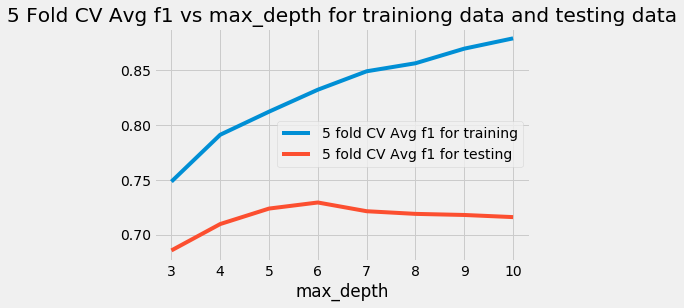

In [54]:
plt.plot(depth, avg_f1_training, label="5 fold CV Avg f1 for training")
plt.plot(depth, avg_f1_testing, label="5 fold CV Avg f1 for testing")
plt.xlabel('max_depth')
plt.title('5 Fold CV Avg f1 vs max_depth for trainiong data and testing data')
plt.legend()
plt.show()

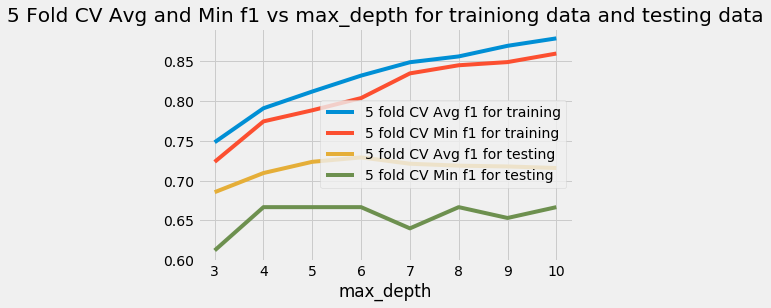

In [55]:
plt.plot(depth, avg_f1_training, label="5 fold CV Avg f1 for training")
plt.plot(depth, min_f1_training, label="5 fold CV Min f1 for training")
plt.plot(depth, avg_f1_testing, label="5 fold CV Avg f1 for testing")
plt.plot(depth, min_f1_testing, label="5 fold CV Min f1 for testing")
plt.xlabel('max_depth')
plt.title('5 Fold CV Avg and Min f1 vs max_depth for trainiong data and testing data')
plt.legend()
plt.show()